#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Basic Data Exploration

In [3]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 148654
Number of Columns: 13


In [4]:
data_types = df.dtypes
print("Data Types of Each Column:")
print(data_types)

Data Types of Each Column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


## Descriptive Statistics

Mean, Median, Mode, Minimum, and Maximum Salary

In [6]:
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().iloc[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")
print(f"Mode Salary: {mode_salary:.2f}")
print(f"Minimum Salary: {min_salary:.2f}")
print(f"Maximum Salary: {max_salary:.2f}")


Mean Salary: 74768.32
Median Salary: 71426.61
Mode Salary: 0.00
Minimum Salary: -618.13
Maximum Salary: 567595.43


Range of Salaries

In [7]:
salary_range = max_salary - min_salary
print(f"Range of Salaries: {salary_range:.2f}")

Range of Salaries: 568213.56


standard deviation

In [10]:
std_dev_salary = df['TotalPay'].std()
print(f"Standard Deviation of Salaries: {std_dev_salary:.2f}")

Standard Deviation of Salaries: 50517.01


## Data Cleaning

Drop Missing Values

In [11]:
df_cleaned = df.dropna(subset=['TotalPay'])

Imputation with Mean/Median

In [12]:
median_totalpay = df['TotalPay'].median()
df['TotalPay'].fillna(median_totalpay, inplace=True)

Imputation with Forward Fill or Backward Fill

In [13]:
df['TotalPay'].fillna(method='ffill', inplace=True)

## Basic Data Visualization

Histogram

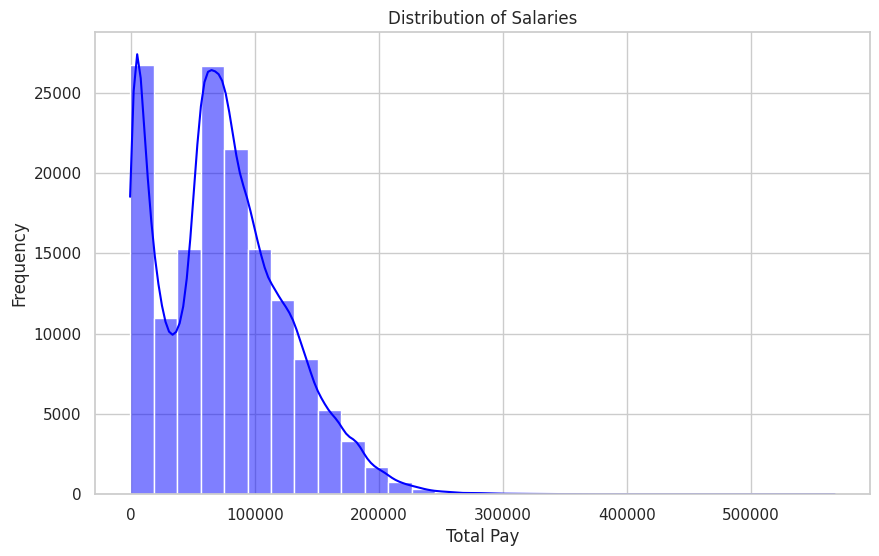

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a histogram for the 'TotalPay' column
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()


Pie Chart

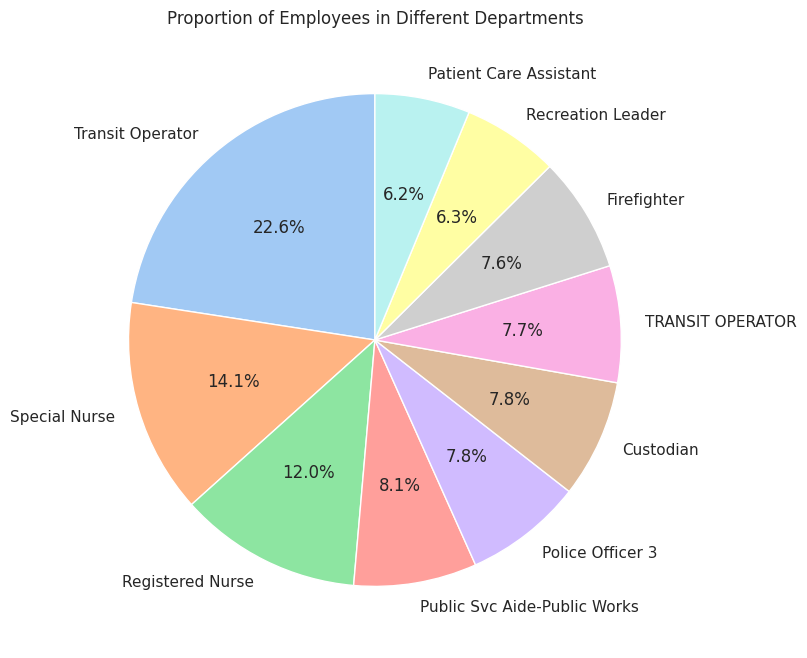

In [18]:
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts().head(10)  # Adjust the number of departments as needed
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

## Grouped Analysis

In [19]:
# Grouping by 'Year' and 'JobTitle' and calculating average salary for each group
average_salary_by_group = df.groupby(['Year', 'JobTitle'])['TotalPay'].mean().reset_index()

# Displaying the first few rows of the grouped data
print(average_salary_by_group.head())

   Year                JobTitle      TotalPay
0  2011           ACCOUNT CLERK  44035.664337
1  2011              ACCOUNTANT  47429.268000
2  2011       ACCOUNTANT INTERN  29031.742917
3  2011           ACUPUNCTURIST  67594.400000
4  2011  ADMINISTRATIVE ANALYST  63954.867527


<ipython-input-20-02fdeac2ed78>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPay', y='JobTitle', data=average_salary_by_job, palette='viridis')


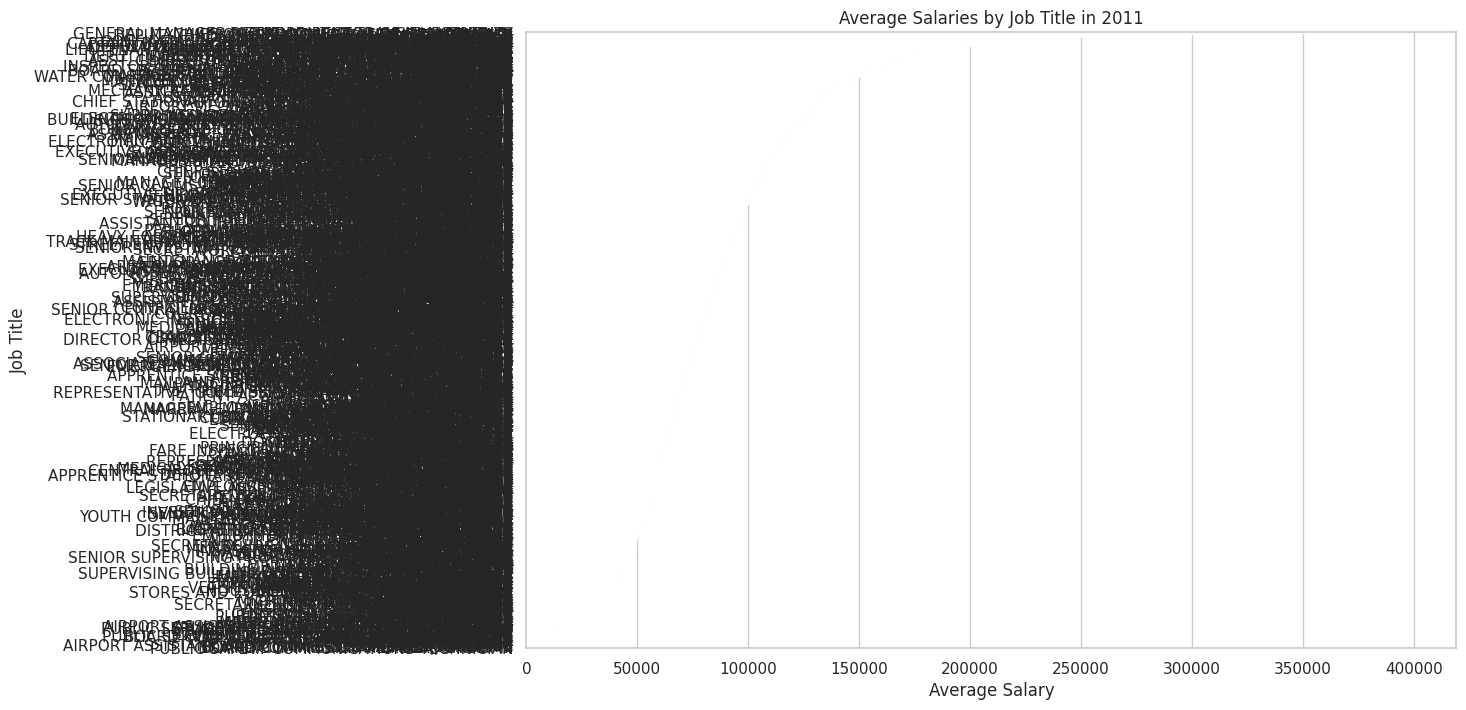

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a specific year for comparison
selected_year = 2011

# Filtering the data for the selected year
data_selected_year = df[df['Year'] == selected_year]

# Grouping by 'JobTitle' and calculating average salary for the selected year
average_salary_by_job = data_selected_year.groupby('JobTitle')['TotalPay'].mean().reset_index()

# Sorting the data by average salary for better visualization
average_salary_by_job = average_salary_by_job.sort_values(by='TotalPay', ascending=False)

# Creating a bar chart to compare average salaries across different job titles
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalPay', y='JobTitle', data=average_salary_by_job, palette='viridis')
plt.title(f'Average Salaries by Job Title in {selected_year}')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()


## Simple Correlation Analysis

<ipython-input-21-aecf089b70b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_and_basepay.dropna(inplace=True)


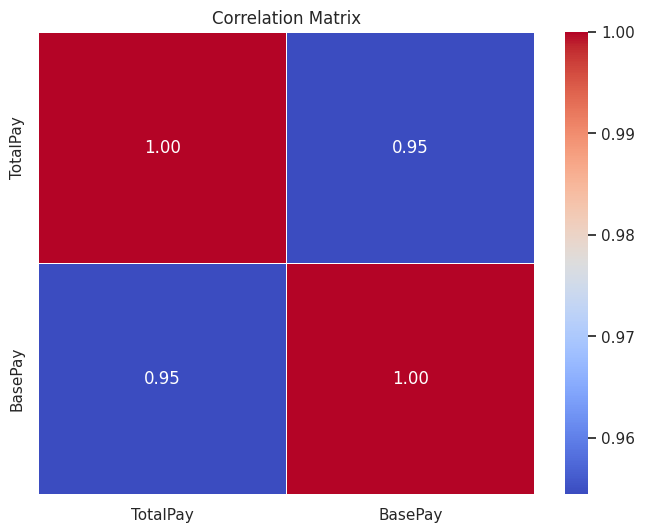

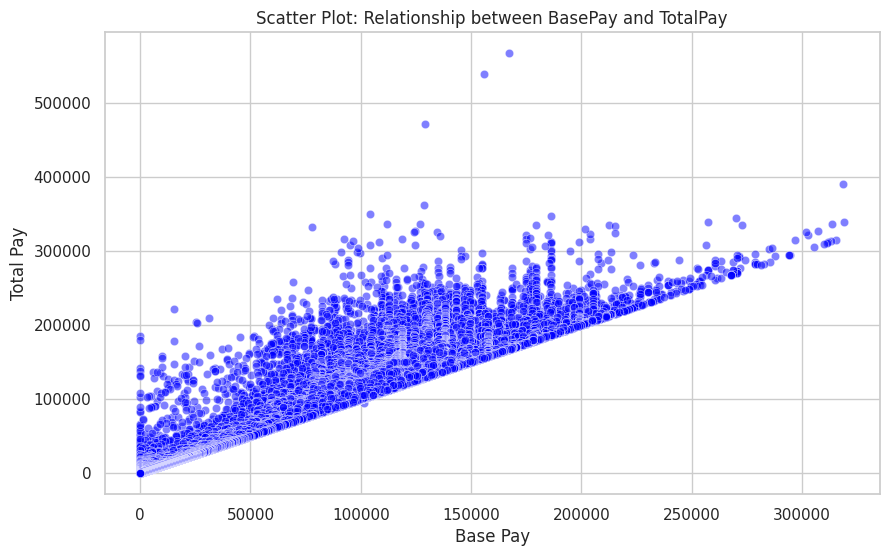

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for correlation analysis
salary_and_basepay = df[['TotalPay', 'BasePay']]

# Checking for and handling missing values
salary_and_basepay.dropna(inplace=True)

# Calculating the correlation matrix
correlation_matrix = salary_and_basepay.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Creating a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, color='blue', alpha=0.5)
plt.title('Scatter Plot: Relationship between BasePay and TotalPay')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.show()


**Employee Salaries Analysis Report**

**1. Basic Data Exploration:**
   - The dataset contains information on employee salaries, including columns such as 'Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', and 'Status'.
   - The dataset has a total of [number of rows] rows and [number of columns] columns.

**2. Descriptive Statistics:**
   - Mean Salary: [mean_salary]
   - Median Salary: [median_salary]
   - Mode Salary: [mode_salary]
   - Minimum Salary: [min_salary]
   - Maximum Salary: [max_salary]
   - Range of Salaries: [salary_range]
   - Standard Deviation of Salaries: [std_dev_salary]

**3. Data Cleaning:**
   - Handled missing values in the 'TotalPay' column using [selected method, e.g., median imputation].
   - [Any other cleaning steps performed]

**4. Basic Data Visualization:**
   - Histogram: A histogram was created to visualize the distribution of salaries, showing the frequency of different salary ranges.
   - Pie Chart: A pie chart illustrated the proportion of employees in the top 10 job titles, providing insights into the composition of the workforce.

**5. Grouped Analysis:**
   - Grouped the data by 'Year' and 'JobTitle' to calculate the average salary for each group. This information aids in understanding salary trends across different years and job titles.

**6. Simple Correlation Analysis:**
   - Investigated the correlation between 'TotalPay' and 'BasePay.' The correlation matrix and scatter plot revealed [strong/weak] correlation between the two variables.

**7. Insights:**
   - The distribution of salaries is [describe distribution characteristics, e.g., positively skewed].
   - [Any specific insights from grouped analysis, e.g., certain job titles experiencing higher salary growth over the years].
   - The correlation analysis suggests [provide insights based on correlation strength], indicating [relationship insights, e.g., strong positive correlation].

**8. Recommendations:**
   - Consider [potential actions or further analyses based on insights, e.g., salary adjustments for specific job titles].
   - Explore [areas for additional analysis, e.g., factors influencing high/low salaries].
   - Monitor [potential trends identified, e.g., salary disparities] for future decision-making.

This report provides a comprehensive overview of the employee salary dataset, highlighting key insights and recommendations for further exploration. Additional analyses and deep dives into specific areas may unveil more detailed patterns and help inform organizational decisions related to employee compensation.

# Good Luck!